## | CC_EDTH_02 - Customer Churn |

## Business Objective

    An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

## Variable Description

    AccountID           account unique identifier 
    Churn               account churn flag (Target) 
    Tenure              Tenure of account 
    City_Tier           Tier of primary customer's city 
    CC_Contacted_L12m   How many times all the customers of the account has contacted customer care in last 12months 
    Payment             Preferred Payment mode of the customers in the account 
    Gender              Gender of the primary customer of the account 
    Service_Score       Satisfaction score given by customers of the account on service provided by company 
    Account_user_count  Number of customers tagged with this account 
    account_segment     Account segmentation on the basis of spend 
    CC_Agent_Score      Satisfaction score given by customers of the account on customer care service provided by company 
    Marital_Status      Marital status of the primary customer of the account 
    rev_per_month       Monthly average revenue generated by account in last 12 months 
    Complain_l12m       Any complaints has been raised by account in last 12 months 
    rev_growth_yoy      revenue growth percentage of the account (last 12 months vs last 24 to 13 month) 
    coupon_used_l12m    How many times customers have used coupons to do the payment in last 12 months 
    Day_Since_CC_connect Number of days since no customers in the account has contacted the customer care 
    cashback_l12m        Monthly average cashback generated by account in last 12 months 
    Login_device         Preferred login device of the customers in the account 

## Importing Libraries

In [3]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import optuna.integration.lightgbm as lgb

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Feature Import

#### 1. Importing Dataset

In [6]:
df=pd.read_excel('Customer Churn.xlsx', sheet_name= "Data for DSBA")
df.head(2)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile


## Feature Removal

#### 1. Drop Irrevalent Features

In [7]:
df = df.drop(["AccountID"], axis=1)

df.head(2)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile


## Feature Identification

### 1. Basics Statistics

####    1. (a) Dimensions of Input DataFrame

In [8]:
df.shape

(11260, 18)

#### 1. (b) Details of Input DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

#### 1. (c) Visualization of 'Target Value'

<AxesSubplot:>

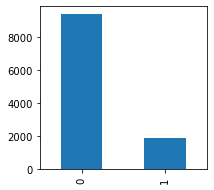

In [10]:
df['Churn'].value_counts().plot(kind='bar',figsize=(3,3))

#### 1. (d) Five Point Summary of Dataset

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


#### 1. (e) Feature Replacements

In [12]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

## Feature Visualization (on 'Main Dataset')

In [13]:
import sweetviz as sv
eda_report_1 = sv.analyze(df)
eda_report_1.show_html('EDA_sweetviz.html')
eda_report_1.show_notebook(w=None, h=None,scale=None,layout='vertical',
filepath='C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/EDA_sweetviz_maindata.html')

ModuleNotFoundError: No module named 'sweetviz'

## Feature Cleaning

#### 1. Missing Value Check

In [ ]:
df.isnull().sum()

In [ ]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

#### 2. Missing Value Treatment

In [ ]:
df['Tenure'] = df['Tenure'].fillna("No_info")
df['Payment'] = df['Payment'].fillna("No_info")
df['Gender'] = df['Gender'].fillna("No_info")
df['Account_user_count'] = df['Account_user_count'].fillna("No_info")
df['account_segment'] = df['account_segment'].fillna("No_info")
df['Marital_Status'] = df['Marital_Status'].fillna("No_info")
df['rev_per_month'] = df['rev_per_month'].fillna("No_info")
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna("No_info")
df['cashback'] = df['cashback'].fillna("No_info")
df['Login_device'] = df['Login_device'].fillna("No_info")

In [ ]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mean())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].mean())
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mean())
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mean())
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mean())

In [ ]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

#### 3. Duplicate Value Check

In [ ]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head(2)

#### 4. Outlier Check

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

#### 5. Outlier Treatment

In [2]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for feature in df[['CC_Contacted_LY','Service_Score']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

## Feature Encoding

In [ ]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes

## Dataset Split

#### 1. Extracting the target column into separate vectors for training set and test set

In [ ]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

## Feature Selection

    It can shows the most important and significant features between all of the features which can mark importance in the performance of the model and get most required business insights.
    For this we have gone through the following procedure of feature selection :
    
    (1) VIF & Multicollinearity (dropping features having VIF>5)
    (2) Checking P values (dropping features having p values > 0.05)
    (3) Chi-square Test (Find most influenced features in ascending order)
    (4) Boruta Algorithm

#### 1. Checking Multicollinearity & VIF

In [ ]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [ ]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

#### 2. Dropping Variables having VIF>5 and Recheck the VIF Values

In [ ]:
X_train = X_train.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
X_test = X_test.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

In [ ]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

#### 3. Using p-values Check

##### Iteration-1

In [ ]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

     Dropping the features having 'p-value' > 0.05

In [ ]:
X_train = X_train.drop(['rev_growth_yoy'],axis=1)
X_test = X_test.drop(['rev_growth_yoy'],axis=1)

##### Iteration-2

In [ ]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

#### 4. Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#
chi2_features = SelectKBest(score_func = chi2, k = "all")
X_train_kbest = chi2_features.fit(X_train, train_labels)
#
X_train_scores = pd.DataFrame(X_train_kbest.scores_,columns=["Score"])
X_train_columns = pd.DataFrame(X_train.columns)
#
X_train_features_rank = pd.concat([X_train_columns,X_train_scores],axis=1)
#
X_train_features_rank.columns = ['Features','Score']
X_train_features_rank

## Significant Features

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

## Dataset Visualization (based on 'Significant Features')

##### Type-1

In [ ]:
import sweetviz as sv
eda_report_2 = sv.analyze(X_train)
#eda_report.show_html('EDA_sweetviz.html')
eda_report_2.show_notebook(w=None, h=None,scale=None,layout='vertical',
filepath='C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/EDA_sweetviz_finaldata.html')

In [ ]:
report_comp=sv.compare([X_train,'Train'],[X_test,'Test']) 
#report_comp.show_html('Compare_Results_sweetviz.html')
report_comp.show_notebook(w=None, h=None,
scale=None,
layout='vertical',
filepath='C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/Compare_Results_sweetviz.html')

##### Type-2

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = "C:/Users/Avijit Chakraborty/Documents/Python Programming/GL - Python Collections/Capstone Project/Customer Churn Data.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

### Univariate Analysis Diagram (based on significant features)

    - It can shows the variability and distribution of the values of each features with respect to the timelines.

In [ ]:
X_train.hist(bins=10, figsize=(10,10))
plt.show()

### Bivariate Analysis Diagram (based on significant features)

    - It can shows the releationship between each features with respect to the all other features.

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X_train.corr(), cmap = 'GnBu', annot = True)

## Model Building

    We have prepare the following model procedures to analyze and review the dataset and get the performance and importance of the features available on the dataset which can gathers more informations about the subjects.
    Following is the list of model building procedure can used in this project :
    
    (1) Logistics Regression
    (2) Decision Tree
    (3) Random Forest
    (4) Linear Discriminant Analysis
    (5) K Nearest Neighbours
    (6) Naive Bayes
    (7) Gradient Boosting
    (8) Extreme Gradient Boosting
    (9) Extra Tree Classifier
    
    For every model building precure, we have gone through the following steps get outputs generated by the alogorithm :
    
    (a) Model Prediction
    (b) Model Performance
    (c) ROC-AUC Graph
    (d) Model Performance Matrics

### 1. Logistic Regression

In [ ]:
model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
model.fit(X_train, train_labels) 

#### 1. (a) Model Prediction

In [ ]:
y_predict_train = model.predict(X_train)
log_train_acc = model.score(X_train, train_labels)
log_train_acc

In [ ]:
y_predict_test = model.predict(X_test)
log_test_acc = model.score(X_test, test_labels)
log_test_acc

In [ ]:
model.intercept_

In [ ]:
model.coef_

#### 1. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, y_predict_train)

In [ ]:
print(classification_report(train_labels, y_predict_train))

In [ ]:
confusion_matrix(test_labels, y_predict_test)

In [ ]:
print(classification_report(test_labels, y_predict_test))

#### 1. (c) ROC-AUC Graph

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

#### 1. (d) Model Performance Metrices

In [ ]:
log_metrics=classification_report(train_labels, y_predict_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

In [ ]:
log_metrics=classification_report(test_labels, y_predict_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

### 2. Decision Tree

In [ ]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, train_labels)

In [ ]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, train_labels)

#### 2. (a) Model Prediction

In [ ]:
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

In [ ]:
gs_dtcl.best_score_

In [ ]:
dot_data1 = tree.export_graphviz(dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [ ]:
dt_imp = pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns)
print(dt_imp)

In [ ]:
reg_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_dtcl.fit(X_train, train_labels)

In [ ]:
dot_data2 = tree.export_graphviz(reg_dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [ ]:
ytrain_predict = reg_dtcl.predict(X_train)
ytest_predict = reg_dtcl.predict(X_test)
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

In [ ]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

#### 2. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

In [ ]:
confusion_matrix(test_labels, ytest_predict)

In [ ]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

In [ ]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

In [ ]:
print(classification_report(train_labels, ytrain_predict))

In [ ]:
print(classification_report(test_labels, ytest_predict))

#### 2. (c) ROC-AUC Graph

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = reg_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

# show the plot
plt.show()

#### 2. (d) Model Performance Metrices

In [ ]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

In [ ]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

#### 2. (e) Feature Importance

In [ ]:
reg_dt_imp = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                          index = X_train.columns).sort_values('Imp',ascending=False)
print(reg_dt_imp)

### 3. Random Forest

In [ ]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search_rf.fit(X_train, train_labels)

In [ ]:
grid_search_rf.best_params_

In [ ]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

In [ ]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,30,64]
for i in random_state:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train,train_labels)
    print(rfcl.oob_score_)

In [ ]:
rfcl=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True,n_jobs=-1)
rfcl=rfcl.fit(X_train,train_labels)
rfcl.oob_score_

In [ ]:
rfcl=rfcl.fit(X_test,test_labels)
rfcl.oob_score_

#### 3. (a) Model Prediction

In [ ]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)
ytrain_predict_prob=best_grid_rf.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

In [ ]:
ytest_predict_prob=best_grid_rf.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

#### 3. (b) Model Performance

In [ ]:
confusion_matrix(train_labels,ytrain_predict)

In [ ]:
confusion_matrix(test_labels, ytest_predict)

In [ ]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

In [ ]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

In [ ]:
print(classification_report(train_labels,ytrain_predict))

In [ ]:
print(classification_report(test_labels, ytest_predict))

#### 3. (c) ROC-AUC Graph

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [ ]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

#### 3. (d) Model Performance Metrices

In [ ]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

In [ ]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

#### 3.(e) Feature Importance

In [ ]:
rf_imp = pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], 
                      index = X_train.columns).sort_values('Imp',ascending=False)
print(rf_imp)

### 4. Linear Discriminant Analysis

In [ ]:
clf = LinearDiscriminantAnalysis(solver='eigen',shrinkage = 'auto',)
model=clf.fit(X_train,train_labels)
model

#### 4. (a) Model Prediction

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)
#*************************************************************#
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
pred_class_test

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
#*************************************************************#
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

#### 4. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, pred_class_train)

In [ ]:
confusion_matrix(test_labels, pred_class_test)

In [ ]:
lda_train_acc = model.score(X_train,train_labels)
lda_train_acc

In [ ]:
lda_test_acc = model.score(X_test,test_labels)
lda_test_acc

In [ ]:
print(classification_report(train_labels, pred_class_train))

In [ ]:
print(classification_report(test_labels, pred_class_test))

#### 4. (c) ROC-AUC Graph

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')

# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.')

# show the plot
plt.show()

#### 4. (d) Model Performance Metrices

In [ ]:
lda_metrics=classification_report(train_labels, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

In [ ]:
lda_metrics=classification_report(test_labels, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["0"][2],2)
lda_test_recall=round(df.loc["0"][1],2)
lda_test_precision=round(df.loc["0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

### 5. K Nearest Neighbours

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors = 15,
                              weights = 'uniform',
                              metric = 'minkowski')
KNN_model.fit(X_train,train_labels)

#### 5. (a) Model Prediction

In [ ]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_acc = KNN_model.score(X_train, train_labels)
KNN_train_acc

In [ ]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_acc = KNN_model.score(X_test, test_labels)
KNN_test_acc

#### 5. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, KNN_train_predict)

In [ ]:
confusion_matrix(test_labels, KNN_test_predict)

In [ ]:
print(classification_report(train_labels, KNN_train_predict))

In [ ]:
print(classification_report(test_labels, KNN_test_predict))

#### 5. (c) ROC-AUC Graph

In [ ]:
KNN_train_fpr, KNN_train_tpr,_=roc_curve(train_labels,KNN_model.predict_proba(X_train)[:,1])
plt.plot(KNN_train_fpr,KNN_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_train_auc=roc_auc_score(train_labels,KNN_model.predict_proba(X_train)[:,1])
print('Area under Curve is', KNN_train_auc)

In [ ]:
KNN_test_fpr, KNN_test_tpr,_=roc_curve(test_labels,KNN_model.predict_proba(X_test)[:,1])
plt.plot(KNN_test_fpr,KNN_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_test_auc=roc_auc_score(test_labels,KNN_model.predict_proba(X_test)[:,1])
print('Area under Curve is', KNN_test_auc)

#### 5. (d) Model Performance Metrices

In [ ]:
KNN_metrics=classification_report(train_labels, KNN_train_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

In [ ]:
KNN_metrics=classification_report(test_labels, KNN_test_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df.loc["1"][2],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_precision=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []
#
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train_labels)
    # evaluate test accuracy
    scores = knn.score(X_test, test_labels)
    ac_scores.append(scores)
#
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

In [ ]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 6. Gaussian Naive Bayes

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, train_labels)

#### 6. (a) Model Prediction

In [ ]:
NB_train_predict = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, train_labels)   
NB_train_acc 

In [ ]:
NB_test_predict = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, test_labels)
NB_test_acc

#### 6. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, NB_train_predict) 

In [ ]:
confusion_matrix(test_labels, NB_test_predict)

In [ ]:
print(classification_report(train_labels, NB_train_predict))

In [ ]:
print(classification_report(test_labels, NB_test_predict))

#### 6. (c) ROC-AUC Graph

In [ ]:
NB_train_fpr, NB_train_tpr,_=roc_curve(train_labels,NB_model.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr,NB_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_train_auc=roc_auc_score(train_labels,NB_model.predict_proba(X_train)[:,1])
print('Area under Curve is', NB_train_auc)

In [ ]:
NB_test_fpr, NB_test_tpr,_=roc_curve(test_labels,NB_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr,NB_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_test_auc=roc_auc_score(test_labels,NB_model.predict_proba(X_test)[:,1])
print('Area under Curve is', NB_test_auc)

#### 6. (d) Model Performance Metrices

In [ ]:
NB_metrics=classification_report(train_labels, NB_train_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

In [ ]:
NB_metrics=classification_report(test_labels, NB_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_f1=round(df.loc["1"][2],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_precision=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

### 7. Gradient Boosting

In [ ]:
params = {'loss' : 'deviance',
          'n_estimators': 100, 
          'max_depth': 10, 
          'criterion': 'friedman_mse',
          'subsample': 1.0,
          'learning_rate': 0.1, 
          'min_samples_leaf': 10, 
          'min_samples_split': 50,
          'random_state': 1,
          'ccp_alpha' : 0.5}
#
gbcl = GradientBoostingClassifier(**params)
gbcl = gbcl.fit(X_train, train_labels)

#### 7. (a) Model Prediction

In [ ]:
gbcl_train_predict = gbcl.predict(X_train)
gbcl_test_predict = gbcl.predict(X_test)

In [ ]:
gbcl_train_acc = gbcl.score(X_train,train_labels)
gbcl_train_acc

In [ ]:
gbcl_test_acc = gbcl.score(X_test,test_labels)
gbcl_test_acc

#### 7. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, gbcl_train_predict) 

In [ ]:
confusion_matrix(test_labels, gbcl_test_predict)

In [ ]:
print(classification_report(train_labels, gbcl_train_predict))

In [ ]:
print(classification_report(test_labels, gbcl_test_predict))

#### 7. (c) ROC-AUC Graph

In [ ]:
gbcl_train_fpr, gbcl_train_tpr,_=roc_curve(train_labels,gbcl.predict_proba(X_train)[:,1])
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gbcl_train_auc=roc_auc_score(train_labels,gbcl.predict_proba(X_train)[:,1])
print('Area under Curve is', gbcl_train_auc)

In [ ]:
gbcl_test_fpr, gbcl_test_tpr,_=roc_curve(test_labels,gbcl.predict_proba(X_test)[:,1])
plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gbcl_test_auc=roc_auc_score(test_labels,gbcl.predict_proba(X_test)[:,1])
print('Area under Curve is', gbcl_test_auc)

#### 7. (d) Model Performance Metrices

In [ ]:
gbcl_metrics=classification_report(train_labels, gbcl_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

In [ ]:
gbcl_metrics=classification_report(test_labels, gbcl_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["1"][2],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

### 8. Xtreme Gradient Boosting (XGB)

In [ ]:
xgb = XGBClassifier(base_score = 0.5, 
                    colsample_bylevel = 1, 
                    colsample_bytree = 1,
                    gamma = 0, 
                    learning_rate = 0.1, 
                    max_depth = 10,
                    min_child_weight = 1, 
                    n_estimators = 100, 
                    objective ='binary:logistic', 
                    reg_alpha = 1, 
                    reg_lambda = 1,
                    scale_pos_weight=1,  
                    subsample = 1)
xgb = xgb.fit(X_train, train_labels)

#### 8. (a) Model Prediction

In [ ]:
xgb_train_predict = xgb.predict(X_train)
xgb_test_predict = xgb.predict(X_test)

In [ ]:
xgb_train_acc = xgb.score(X_train,train_labels)
xgb_train_acc

In [ ]:
xgb_test_acc = xgb.score(X_test,test_labels)
xgb_test_acc

#### 8. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, xgb_train_predict) 

In [ ]:
confusion_matrix(test_labels, xgb_test_predict)

In [ ]:
print(classification_report(train_labels, xgb_train_predict))

In [ ]:
print(classification_report(test_labels, xgb_test_predict))

#### 8. (c) ROC-AUC Graph

In [ ]:
xgb_train_fpr, xgb_train_tpr,_=roc_curve(train_labels,xgb.predict_proba(X_train)[:,1])
plt.plot(xgb_train_fpr,xgb_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_train_auc=roc_auc_score(train_labels,xgb.predict_proba(X_train)[:,1])
print('Area under Curve is', xgb_train_auc)

In [ ]:
xgb_test_fpr, xgb_test_tpr,_=roc_curve(test_labels,xgb.predict_proba(X_test)[:,1])
plt.plot(xgb_test_fpr,xgb_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_test_auc=roc_auc_score(test_labels,xgb.predict_proba(X_test)[:,1])
print('Area under Curve is', xgb_test_auc)

#### 8. (d) Model Performance Metrices

In [ ]:
xgb_metrics=classification_report(train_labels, xgb_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_train_f1=round(df.loc["1"][2],2)
xgb_train_recall=round(df.loc["1"][1],2)
xgb_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',xgb_train_precision)
print ('gbcl_train_recall ',xgb_train_recall)
print ('gbcl_train_f1 ',xgb_train_f1)

In [ ]:
xgb_metrics=classification_report(test_labels, xgb_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_test_f1=round(df.loc["1"][2],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',xgb_test_precision)
print ('gbcl_test_recall ',xgb_test_recall)
print ('gbcl_test_f1 ',xgb_test_f1)

### 9. Extra Tree Classifier

In [ ]:
etc = ExtraTreesClassifier(n_estimators = 100,
                           criterion ='gini',
                           max_depth = 10,
                           min_samples_split = 10,
                           min_samples_leaf = 50,
                           max_features = 'auto',
                           min_impurity_decrease = 0.5,
                           random_state = 1)
etc = etc.fit(X_train, train_labels)

#### 9. (a) Model Prediction

In [ ]:
etc_train_predict = etc.predict(X_train)
etc_test_predict = etc.predict(X_test)

In [ ]:
etc_train_acc = etc.score(X_train,train_labels)
etc_train_acc

In [ ]:
etc_test_acc = etc.score(X_test,test_labels)
etc_test_acc

#### 9. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, etc_train_predict) 

In [ ]:
confusion_matrix(test_labels, etc_test_predict)

In [ ]:
print(classification_report(train_labels, etc_train_predict))

In [ ]:
print(classification_report(test_labels, etc_test_predict))

#### 9. (c) ROC-AUC Graph

In [ ]:
etc_train_fpr, etc_train_tpr,_= roc_curve(train_labels,etc.predict_proba(X_train)[:,1])
plt.plot(etc_train_fpr,etc_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
etc_train_auc=roc_auc_score(train_labels,etc.predict_proba(X_train)[:,1])
print('Area under Curve is', etc_train_auc)

In [ ]:
etc_test_fpr, etc_test_tpr,_= roc_curve(test_labels,etc.predict_proba(X_test)[:,1])
plt.plot(etc_test_fpr,etc_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
etc_test_auc=roc_auc_score(test_labels,etc.predict_proba(X_test)[:,1])
print('Area under Curve is', etc_test_auc)

#### 9. (d) Model Performance Metrices

In [ ]:
etc_metrics=classification_report(train_labels, etc_train_predict,output_dict=True)
df=pd.DataFrame(etc_metrics).transpose()
etc_train_f1=round(df.loc["1"][2],2)
etc_train_recall=round(df.loc["1"][1],2)
etc_train_precision=round(df.loc["1"][0],2)
print ('etc_train_precision ',etc_train_precision)
print ('etc_train_recall ',etc_train_recall)
print ('etc_train_f1 ',etc_train_f1)

In [ ]:
etc_metrics=classification_report(test_labels, etc_test_predict,output_dict=True)
df=pd.DataFrame(etc_metrics).transpose()
etc_test_f1=round(df.loc["1"][2],2)
etc_test_recall=round(df.loc["1"][1],2)
etc_test_precision=round(df.loc["1"][0],2)
print ('etc_test_precision ',etc_test_precision)
print ('etc_test_recall ',etc_test_recall)
print ('etc_test_f1 ',etc_test_f1)

## Model Performance Comparison

    -Prepare the comparison table and graph showing accuracy, AUC, precision, recall & F1 score generated on each algorithm.

#### 1. Performance Matrics - on Train Data

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
       'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],          
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1], 
       'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'Gr.Boost Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1], 
       'XG Boost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
       'Extra Tree Train':[etc_train_acc,etc_train_auc,etc_train_recall,etc_train_precision,etc_train_f1]},index=index)
round(data,2)

#### 2. Performance Matrics - on Test Data

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],           
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],  
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'Gr.Boost Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],  
        'XG Boost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'Extra Tree Test':[etc_test_acc,etc_test_auc,etc_test_recall,etc_test_precision,etc_test_f1]
},index=index)
round(data,2)

#### 3. ROC-AUC - on Train Data

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(log_train_fpr,log_train_tpr,color='Pink',label="Logistic")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='magenta',label="KNN")
plt.plot(NB_train_fpr,NB_train_tpr,color='yellow',label="NB")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='violet',label="Gr. Boost")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### 4. ROC-AUC - on Test Data

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(log_test_fpr,log_test_tpr,color='pink',label="Logistic")
plt.plot(lda_test_fpr,lda_test_tpr,color='magenta',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='yellow',label="KNN")
plt.plot(NB_test_fpr,NB_test_tpr,color='blue',label="NB")
#plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='violet',label="Gr. Boost")
#plt.plot(xgb_test_fpr,xgb_test_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Feature Importance

    After Cheking all types of model performances, next we need to find the importances of the features used for model building.Below are the procedure used for the same :
    
    (1) Impurity Based (Base estimator = decision tree)
    (2) Permutation Based
    (3) SHAP (shapley additive features)
    (4) ELI5 python Package

#### 1. Impurity-based Importance.

In [ ]:
#feature_names = [f'feature {i}' for i in range(X_train.shape[1])]
forest_importances = pd.Series(best_grid_rf.feature_importances_, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in best_grid_rf.estimators_], axis=0)
#
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 2. Permutation-based Importance.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(best_grid_rf, X_test, test_labels, n_repeats=10, random_state=1, n_jobs=2)
#
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Importances using Permutation on Full Model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### 3. SHAP Value-based Importance.

In [ ]:
import shap  # package used to calculate Shap values
row_to_show = 5
data_for_prediction = X_train.iloc[row_to_show]
explainer = shap.TreeExplainer(best_grid_rf) # Create object that can calculate shap values
shap_values = explainer.shap_values(data_for_prediction) # Calculate Shap values
#
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(best_grid_rf.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

#### 4. ELI5 Feature Importance.

In [ ]:
import eli5 as eli
eli.explain_weights(best_grid_rf)

In [ ]:
eli.explain_prediction(best_grid_rf , np.array(X_test)[1])

In [ ]:
eli.show_prediction(best_grid_rf, X_test.iloc[1],feature_names=list(X_train.columns),
                    show_feature_values=True)

In [ ]:
eli.show_prediction(best_grid_rf, X_test.iloc[20],feature_names=list(X_train.columns),
                    show_feature_values=True)

#### 5. Shap-Hypertune Feature Importance.

In [ ]:
import catboost as cb
model = cb.CatBoostClassifier(verbose=False)    
model.fit(X_train, train_labels)
from shap_selection import feature_selection
feature_order = feature_selection.shap_select(model, X_train, X_test, X_train.columns, agnostic=False)
#
feature_order=pd.DataFrame(feature_order).T
feature_order.columns = ['Feature','Values']
feature_order.head(15)

## Cross-Validation

In [ ]:
index=['Mean']
data = pd.DataFrame(
      {'CART':[cross_val_score(dtcl, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Random Forest':[cross_val_score(rfcl, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Logistics':[cross_val_score(model, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'LDA':[cross_val_score(clf, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'KNN':[cross_val_score(KNN_model, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Naive Bayes':[cross_val_score(NB_model, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Gradient Boost':[cross_val_score(gbcl, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'XG Boost':[cross_val_score(xgb, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()],
       'Extra Tree':[cross_val_score(etc, X_train, train_labels,scoring="neg_mean_squared_error",cv=10).mean()]},index=index)
round(data,2)

## Model Check - Alternative (1)

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, train_labels, test_labels)
models

## Model Check - Alternative (2)

In [ ]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations = 5, population_size = 100, verbosity = 2, n_jobs = -1)
tpot.fit(X_train,train_labels)

AttributeError: module 'os' has no attribute 'getcdw'

In [6]:
import os

In [ ]:
os.getc